**<font size=5 color = black>Attenuation Coefficient Simulation-Single Layer</font>**

  Hang Yang

In [227]:
reset


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


**<font color = black>Parameter Initialization</font>**


In [211]:
import numpy as np
import math as math


alpha = 0.5 # a fixed fraction of the attenuated light back scattered
beta = 2    # a conversion factor depending on the  camera
L0 = 1      # the irradiance of the incident light beam
mu = 5      # simulated attenuation coefficient
thickness = 2       # simulated tissue thickness
axialres = 0.004    # axial resolution
tissuepossition = 0.2  # tissue is placed at 0.2mm from zero-delay line

# Construct the simulated tissue
position = [0]*int(tissuepossition/axialres)    
tissue = np.arange(0, thickness, axialres)
tissue = np.append(position,tissue)

depth = np.arange(0, thickness, axialres)

Iz = np.zeros(np.size(tissue))

%whos


Variable          Type       Data/Info
--------------------------------------
Iz                ndarray    550: 550 elems, type `float64`, 4400 bytes
L0                int        1
alpha             float      0.5
axialres          float      0.004
beta              int        2
depth             ndarray    500: 500 elems, type `float64`, 4000 bytes
math              module     <module 'math' (built-in)>
mu                int        5
np                module     <module 'numpy' from 'D:\<...>ges\\numpy\\__init__.py'>
position          list       n=50
thickness         int        2
tissue            ndarray    550: 550 elems, type `float64`, 4400 bytes
tissuepossition   float      0.2


**<font color = black>Light Attenuation simulation to get depth profile</font>**

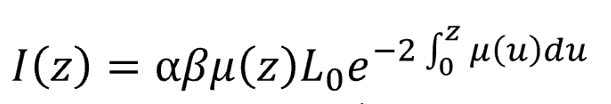

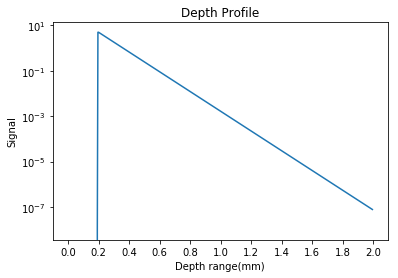

In [214]:
j = 0

for i in tissue:
    Iz[j] = alpha*beta*mu*L0*np.exp(-2*mu*i)
    j = j+1


Iz[0:int(tissuepossition/axialres)-2] = 0
Iz[int(tissuepossition/axialres)-2] = 1e-8



import matplotlib.pyplot as plt
import pylab



plt.plot(depth, Iz[0:(np.size(depth))])
plt.yscale('log')

plt.xticks([i*0.2 for i in range(0,11)])
plt.xlabel("Depth range(mm)")
plt.ylabel("Signal")
plt.title("Depth Profile")

plt.show()

**<font color = black>Based on depth profile Calculate attenuation coefficient</font>**


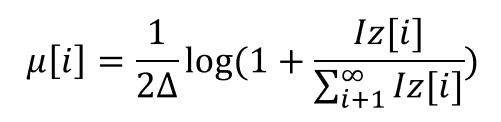

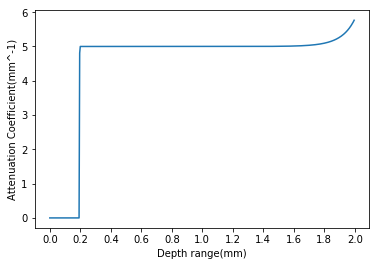

In [216]:
CalMu = np.zeros(np.size(tissue))
j = 0

for i in tissue:
    CalMu[j] = 1/(2*axialres)*math.log(1+Iz[j]/sum(Iz[j+1:len(Iz)]))
    j = j + 1 
    



plt.plot(depth, CalMu[0:(np.size(depth))])


plt.xticks([i*0.2 for i in range(0,11)])
plt.xlabel("Depth range(mm)")
plt.ylabel("Attenuation Coefficient(mm^-1)")


plt.show()


The attenuation coefficient was estimated to be 5/mm at the beginning of the tissue and accurately matches the real simulated attenuation coefficient.  However, towards the end of the depth the attenuation coefficient become larger. That it violates the key assumption that all light is attenuated within the depth range. In our simulation not all light vanished at the end of the range as we could see in the signal depth profile.

**<font color = black>Attenuation coeffcient correction</font>**

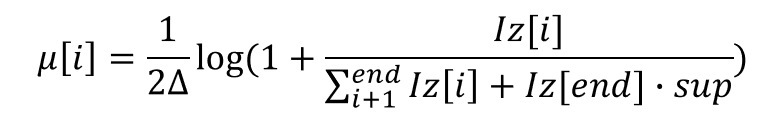

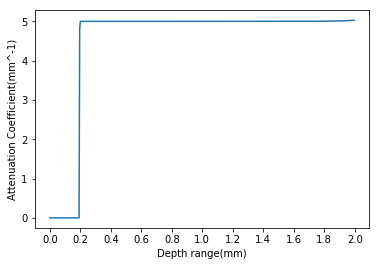

In [226]:
thresh = 31800

sup  = thresh*axialres/mu - thickness

CalMu = np.zeros(np.size(tissue))

j = 0

for i in tissue:
        CalMu[j] = 1/(2*axialres)*math.log(1+Iz[j]/(sum(Iz[j+1:len(Iz)])+Iz[len(Iz)-1]*sup))
        j=j+1
    
                        
plt.plot(depth, CalMu[0:(np.size(depth))])


plt.xticks([i*0.2 for i in range(0,11)])
plt.xlabel("Depth range(mm)")
plt.ylabel("Attenuation Coefficient(mm^-1)")


plt.show()